In [5]:

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [7]:

# Load Titanic dataset and display the first few rows to understand the data
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:

# Get dataset shape (rows, columns)
print(f"Dataset Shape: {titanic.shape}")

Dataset Shape: (891, 15)


In [10]:
# Check data types and non-null counts
titanic.info()

# Get statistical summary of numeric columns
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


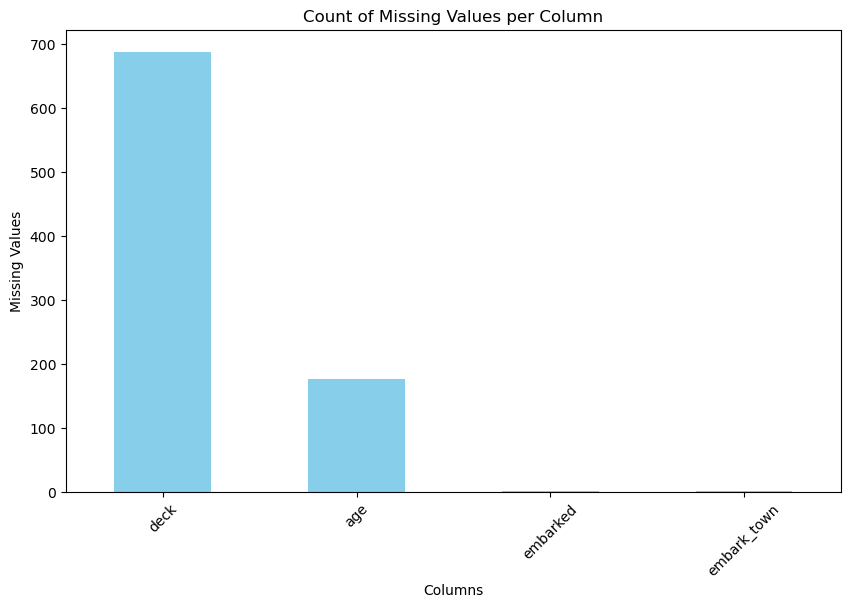

In [12]:
# Check for missing values
titanic.isnull().sum()


# Visualize missing values
#import matplotlib.pyplot as plt

#plt.figure(figsize=(10, 6))
#sns.heatmap(titanic.isnull(), cbar=False, cmap='viridis')
#plt.title("Missing Values Heatmap")
#plt.show()

import matplotlib.pyplot as plt

missing = titanic.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
missing.plot(kind='bar', color='skyblue')
plt.title("Count of Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.xticks(rotation=45)
plt.show()


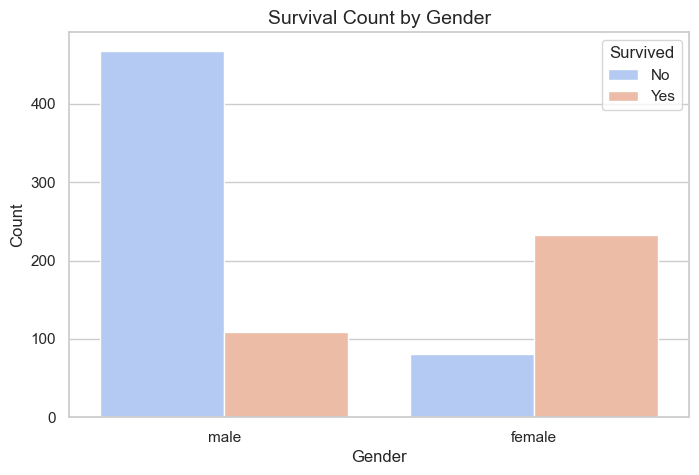

In [14]:
#sns.countplot(data=titanic, x='sex', palette='coolwarm')
#plt.title('Gender Distribution')
#plt.show()


sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='sex', hue='survived', palette='coolwarm')

plt.title('Survival Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


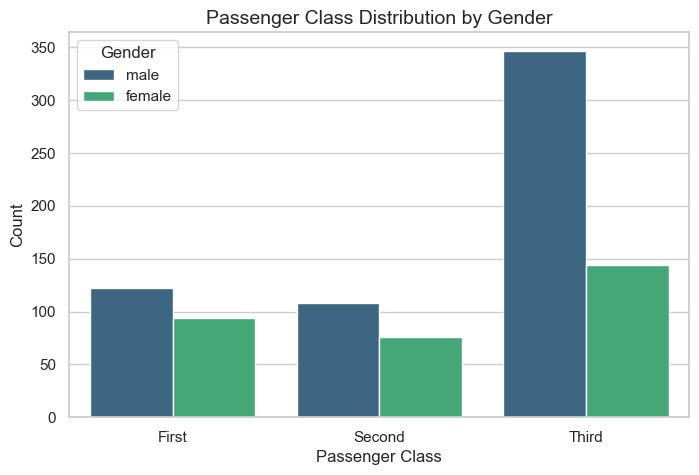

In [16]:
# Create a bar plot for a categorical variable, e.g., 'class'
#plt.figure(figsize=(8, 5))
#sns.countplot(data=titanic, x='class', palette='viridis')
#plt.title('Count of Passengers by Class', fontsize=14)
#plt.xlabel('Passenger Class', fontsize=12)
#plt.ylabel('Count', fontsize=12)
#plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='class', hue='sex', palette='viridis')
plt.title('Passenger Class Distribution by Gender', fontsize=14)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender')
plt.show()


In [17]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
